# Recipe Recommendation System: EDA and Visualization

Author: Kelly Li


## Table of contents:
* [1 Introduction](#one)
* [2 Datasets](#two)
    * [2.1 Data Sources](#twoone)
    * [2.2 Data Loading](#twotwo)
-------------------------------------------------------------------------------------------------------------------------------

## 1 Introduction <a class="anchor" id="one"></a>

## 2 Clean Datasets <a class="anchor" id="two"></a>

### 2.1 Data Sources <a class="anchor" id="twoone"></a>

Here's the data dictionary for the columns in the clean recipe dataset:

| Column Name   | Description                                               |
| ------------- | --------------------------------------------------------- |
| name          | The name of the recipe.                                   |
| id            | The unique identifier of the recipe.                       |
| minutes       | The total cooking and preparation time in minutes.         |
| contributor_id| The unique identifier of the user who submitted the recipe|
| submitted     | The date when the recipe was submitted.                    |
| tags          | Tags or labels associated with the recipe (e.g., vegetarian, vegan, dessert). |
| n_steps       | The total number of steps or instructions in the recipe.   |
| steps         | The step-by-step instructions for preparing the recipe.    |
| description   | A brief description or summary of the recipe.              |
| ingredients   | The list of ingredients required for the recipe.           |
| n_ingredients | The total number of ingredients used in the recipe.        |
| calories      | The total number of calories in the recipe.                |
| total_fat     | The PDV of total fat in the recipe.                        |
| sugar         | The PDV of sugar in the recipe.                            |
| sodium        | The PDV of sodium in the recipe.                           |
| protein       | The PDV of protein in the recipe.                          |
| saturated_fat | The PDV of saturated fat in the recipe.                    |

*PDV = % daily value

Here's the data dictionary for the columns in the clean user interactions dataset:

| Column Name | Description                                          |
| ----------- | ---------------------------------------------------- |
| user_id     | The unique identifier of the user.                    |
| recipe_id   | The unique identifier of the recipe associated with the user's interaction. |
| date        | The date when the user's interaction took place.      |
| rating      | The rating given by the user for the recipe.          |
| review      | The review or feedback provided by the user for the recipe. |

### 2.2 Data Loading <a class="anchor" id="twotwo"></a>

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Read the clean datasets
recipes_df = pd.read_pickle('clean_recipes.pkl')
users_df = pd.read_pickle('clean_interactions.pkl')
food_df = pd.read_pickle('food.pkl')

In [4]:
# Merge the datasets on the common column 'recipe_id'
merged_df = pd.merge(recipes_df, users_df, left_on='id', right_on='recipe_id')

In [5]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010625 entries, 0 to 1010624
Data columns (total 32 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   name             1010625 non-null  object        
 1   id               1010625 non-null  object        
 2   minutes          1010625 non-null  int64         
 3   contributor_id   1010625 non-null  object        
 4   submitted        1010625 non-null  datetime64[ns]
 5   tags             1010625 non-null  object        
 6   n_steps          1010625 non-null  int64         
 7   steps            1010625 non-null  object        
 8   description      1010625 non-null  object        
 9   ingredients      1010625 non-null  object        
 10  n_ingredients    1010625 non-null  int64         
 11  calories         1010625 non-null  float64       
 12  total_fat        1010625 non-null  float64       
 13  sugar            1010625 non-null  float64       
 14  so

In [20]:
# Shape of the data
print('The shape of the recipe dataset is:', recipes_df.shape)
print('The shape of the user interactions dataset is:', users_df.shape)
print('The shape of the merged dataset is:', merged_df.shape)

The shape of the recipe dataset is: (216818, 25)
The shape of the user interactions dataset is: (1071351, 7)
The shape of the merged dataset is: (1010625, 32)


In [6]:
# View recipes dataset
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,n_steps,steps,description,ingredients,...,protein,saturated_fat,carbohydrates,submitted_month,submitted_year,dairy-free,gluten-free,low-carb,vegan,vegetarian
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",...,2.0,0.0,4.0,Sep,2005,0,0,0,0,1
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",...,22.0,35.0,1.0,Jun,2002,0,0,0,0,0
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",...,39.0,27.0,5.0,Feb,2005,0,0,0,0,0
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",...,14.0,8.0,20.0,Apr,2003,0,0,0,0,0
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",...,3.0,0.0,28.0,Oct,2002,0,0,0,0,1


In [7]:
# View user interactions dataset
users_df.head()

,user_id,recipe_id,date,rating,review,review_month,review_year
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,Feb,2003
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",Dec,2011
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,Dec,2002
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,Feb,2010
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",Oct,2011


In [8]:
recipes_df.describe()

,minutes,n_steps,n_ingredients,calories,total_fat,sugar,sodium,protein,saturated_fat,carbohydrates,submitted_year,dairy-free,gluten-free,low-carb,vegan,vegetarian
count,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000,216818.000000
mean,117.722449,8.960179,8.880508,460.648451,35.041574,81.577881,29.633674,33.973784,43.986952,15.067278,2006.465307,0.000862,0.024869,0.185151,0.044406,0.155965
std,1951.118648,4.461852,3.603727,1194.774267,76.532522,818.236742,131.785991,57.041227,94.136496,83.432637,2.913345,0.029355,0.155726,0.388421,0.205996,0.362823
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1999.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,6.000000,6.000000,171.700000,8.000000,9.000000,5.000000,6.000000,7.000000,4.000000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35.000000,8.000000,9.000000,307.800000,20.000000,24.000000,14.000000,18.000000,22.000000,9.000000,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,65.000000,12.000000,11.000000,509.200000,40.000000,66.000000,32.000000,50.000000,51.000000,16.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,288000.000000,21.000000,43.000000,434360.200000,17183.000000,362729.000000,29338.000000,6552.000000,10395.000000,36098.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Nutritional Analysis

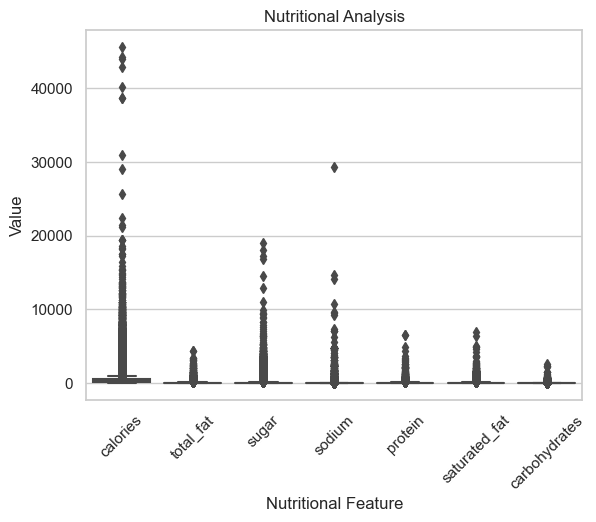

In [ ]:
# Select nutritional columns for analysis
nutritional_columns = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']

# Plot boxplots of nutritional features
sns.boxplot(data=recipes_df[nutritional_columns])
plt.xlabel('Nutritional Feature')
plt.ylabel('Value')
plt.title('Nutritional Analysis')
plt.xticks(rotation=45)
plt.show()

### Correlation Analysis

<Axes: >

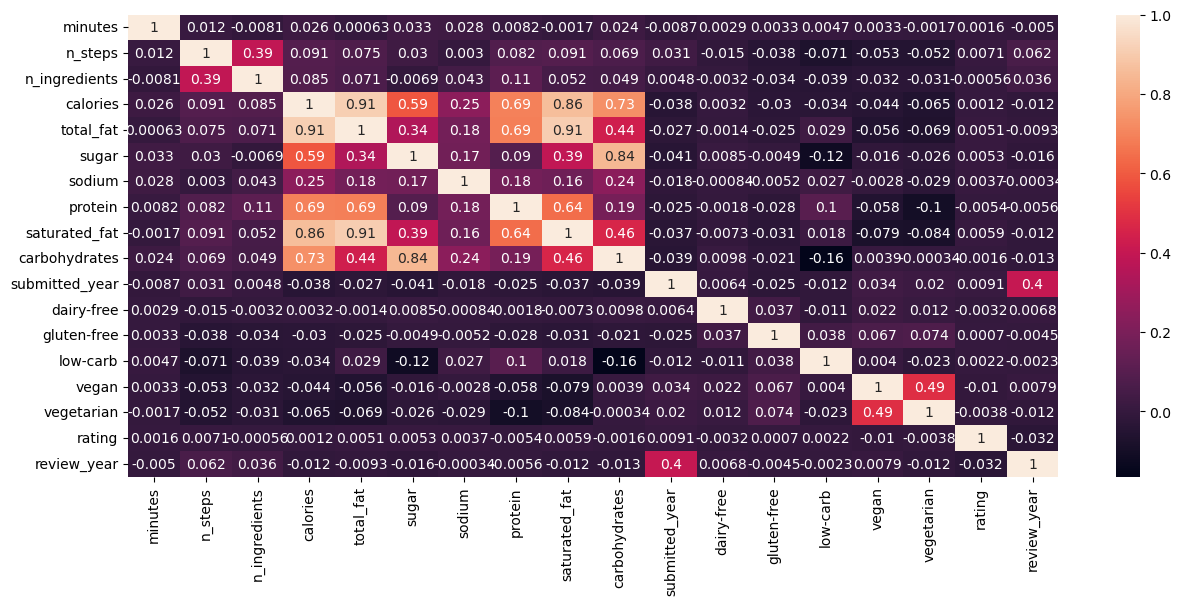

In [9]:
plt.figure(figsize=(15,6))
sns.heatmap(merged_df.corr(),annot=True)

In the correlation analysis conducted, we found a correlation coefficient of 0.49 between the variables 'vegan' and 'vegetarian'. This moderate positive correlation is in line with the relationship between the two dietary labels. It is important to note that all vegan dishes are inherently vegetarian, as they exclude any animal products, while vegetarian dishes may include dairy and eggs. Consequently, the positive correlation observed suggests that recipes labeled as vegan are also likely to be labeled as vegetarian. This correlation analysis provides quantitative evidence supporting the logical relationship between these dietary categories.

Next, the correlation coefficient between 'n_steps' and 'n_ingredients' is 0.39, indicating a moderate positive correlation. This suggests that there is a tendency for recipes with more steps to also have more ingredients. This observation aligns with the intuition that as the number of ingredients increases, additional preparation and cooking steps are typically required to incorporate and combine those ingredients effectively. Therefore, it is expected that recipes with a higher number of ingredients will generally have a higher number of steps. The positive correlation between the number of steps and the number of ingredients reinforces this relationship, indicating that more complex recipes with a greater variety of ingredients tend to involve a greater number of steps in their preparation.

A correlation coefficient of 0.4 between 'submitted_year' and 'review_year' suggests a moderate positive correlation. This indicates that there is a tendency for recipes submitted in earlier years to receive reviews in earlier years as well. However, it's important to note that correlation does not imply causation. This correlation could be influenced by various factors, such as the popularity of certain recipes during specific time periods or the availability of ingredients. Further analysis and consideration of other variables would be needed to understand the underlying reasons behind this correlation.

The correlation between the columns 'calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', and 'carbohydrates' is expected because these features were derived from the 'nutrition' column during the initial data preprocessing. Since these nutritional metrics are closely related to each other, it is reasonable to observe a correlation among them. Let us examine them more closely.

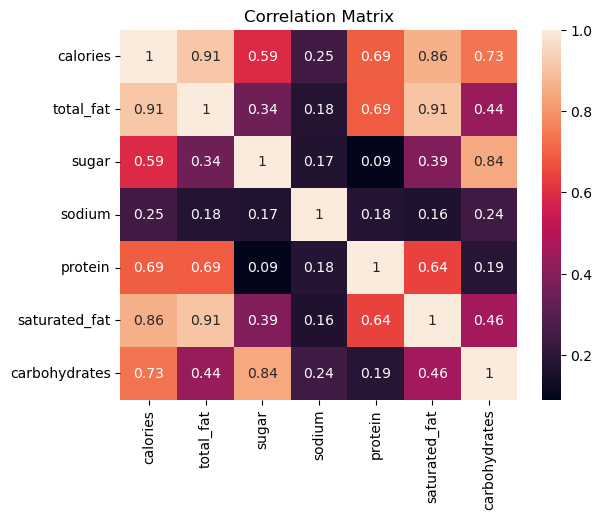

In [18]:
correlation_matrix = merged_df[['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

The strong positive correlations observed between 'calories' and 'total_fat' (correlation coefficient of 0.91) and between 'calories' and 'saturated_fat' (correlation coefficient of 0.86) suggest an association between calorie content and fat-related measures in recipes. As the number of calories increases, there is a tendency for the total fat and saturated fat content to also increase. This is expected, as fat is a concentrated source of energy, containing more calories per gram compared to other macronutrients like protein and carbohydrates. Therefore, recipes with higher calorie counts are more likely to contain higher amounts of total fat and saturated fat, contributing to the observed correlations. It is important to consider these relationships when assessing the nutritional composition and energy content of recipes.

Similarly, the correlation coefficient of 0.73 between 'calories' and 'carbohydrates' suggests a moderate positive correlation between these two variables in recipes. This indicates that as the calorie content of a recipe increases, there is a tendency for the carbohydrate content to also increase. Carbohydrates are one of the macronutrients that contribute to the caloric content of food. They are a primary source of energy for the body and are commonly found in foods such as grains, fruits, and vegetables. Therefore, it is expected that recipes with higher calorie counts would typically contain higher amounts of carbohydrates. However, it is important to note that correlation does not imply causation, and other factors may also influence the relationship between calories and carbohydrates in recipes.

In [18]:
users_df['rating'].value_counts()

5    816229
4    187333
3     40852
2     14122
1     12815
Name: rating, dtype: int64

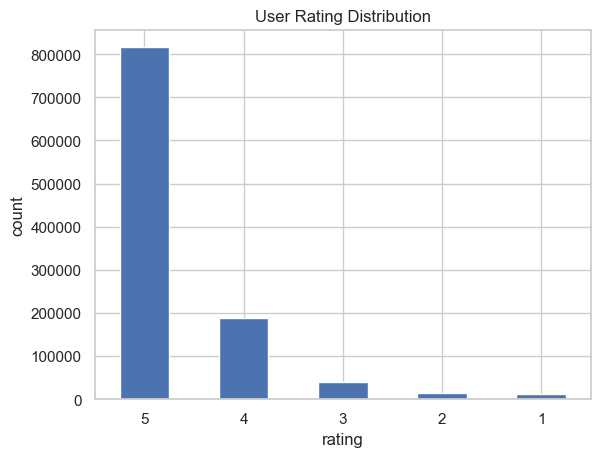

In [19]:
users_df['rating'].value_counts().plot(kind="bar")
plt.xlabel('rating')
plt.ylabel('count')
plt.title('User Rating Distribution')
plt.xticks(rotation=0)
plt.show()

Users consistently provide high ratings for recipes on food.com. While this might suggest universal satisfaction with the recipes, it is important to consider alternative explanations. It is more likely that users who are dissatisfied with a recipe are less inclined to leave a rating, or they attribute any unfavorable outcomes to their own cooking skills rather than the recipe itself. This phenomenon could result in a positive bias in the ratings, as users tend to give recipe authors the benefit of the doubt. Therefore, while high ratings indicate overall positive feedback, it is essential to interpret them within the context of potential rating bias and user behavior.

### User Engagement Analysis

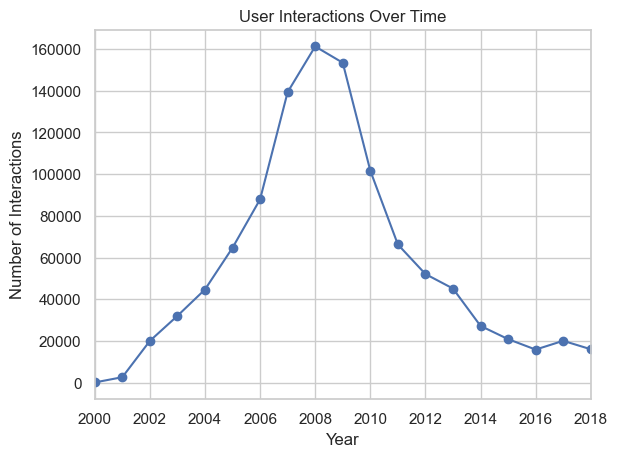

In [82]:

yearly_interaction_counts = users_df['review_year'].value_counts().sort_index()
yearly_interaction_counts.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Interactions')
plt.title('User Interactions Over Time')
plt.xlim(2000, 2018)
plt.show()


This graph shows the number of user interactions, specifically reviews, posted on the platform over time from the year 2000 to 2018. The x-axis represents the years, while the y-axis represents the number of interactions/reviews.

The peak in user interactions occurring in 2008 indicates a significant level of engagement and activity during that year. Several factors could have contributed to this peak, such as a surge in user registrations, increased platform popularity, or specific events or campaigns that attracted more user participation and reviews during that period.

Following the peak in 2008, there is a gradual decline in the number of user interactions over the subsequent years. This decline could be attributed to various factors, including changes in user behavior, shifts in platform dynamics, or the emergence of alternative platforms or social media platforms that diverted user engagement away from the specific platform being analyzed.

### New Recipes Added Over Time

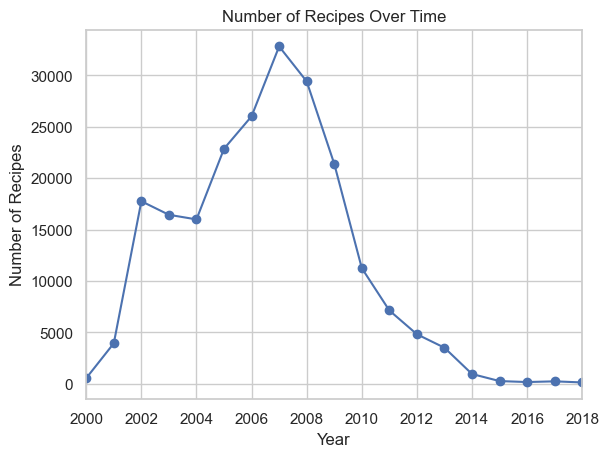

In [85]:
# Perform time-based analysis
time_analysis = recipes_df.groupby('submitted_year').size()
time_analysis.plot(kind='line', marker='o')
plt.xlim(2000, 2018)
plt.xlabel('Year')
plt.ylabel('Number of Recipes')
plt.title('Number of Recipes Over Time')
plt.show()

The graph depicts the temporal pattern of recipe submissions from the year 2000 to 2018. The x-axis represents the years, while the y-axis represents the number of recipes. It shows that the number of recipe submissions steadily increased over the years, with a notable peak occurring in 2017, where the highest number of recipes were submitted. This peak could be attributed to various factors, such as increased user engagement, expanded user base, or promotional efforts to encourage recipe contributions during that period.

After reaching the peak in 2017, the number of recipe submissions gradually declined. This decline could be attributed to several reasons, such as a shift in user preferences, changes in platform dynamics, or a saturation point in recipe contributions.

### Dietary Restrictions

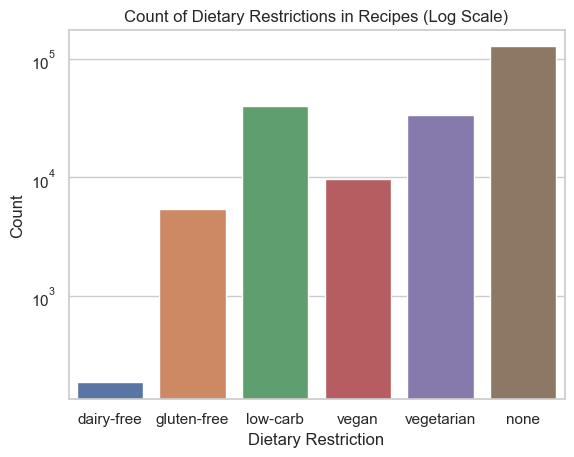

In [41]:
# Calculate the count of recipes for each dietary restriction
dietary_restrictions = ['dairy-free', 'gluten-free', 'low-carb', 'vegan', 'vegetarian']
restriction_counts = recipes_df[dietary_restrictions].sum()

# Add 'none' category when all diet types are 0
restriction_counts['none'] = len(recipes_df) - restriction_counts.sum()

# Plot bar chart of dietary restriction counts with log scale
sns.barplot(x=restriction_counts.index, y=restriction_counts.values)
plt.xlabel('Dietary Restriction')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Count of Dietary Restrictions in Recipes (Log Scale)')
plt.show()

The graph illustrates the distribution of different dietary restrictions within the recipe dataset. The bars represent the count of recipes that fall under each dietary category. The order, from highest to lowest count, is as follows: none (recipes without any specific dietary restriction), low-carb, vegetarian, vegan, gluten-free, and dairy-free. It is important to note that recipes can have multiple dietary restrictions, as the categories are not mutually exclusive. The graph highlights the varying popularity of different dietary preferences among the recipes in the dataset. 

Note that using a log scale in the graph helps to highlight the relative proportions of each dietary restriction category, especially when there are significant differences in counts.

### Ingredient Analysis

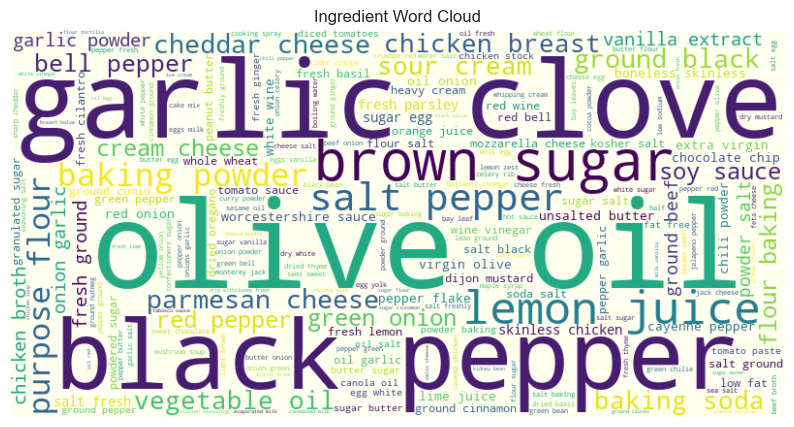

In [45]:
from wordcloud import WordCloud

# Concatenate all ingredients into a single string
ingredients_text = ' '.join(recipes_df['ingredients'].explode().str.replace("'", ""))

# Create a WordCloud object with an off-white background color
wordcloud = WordCloud(width=800, height=400, background_color='ivory').generate(ingredients_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ingredient Word Cloud')
plt.show()


The word cloud visualization highlights the most commonly occurring ingredients in the recipes dataset. The larger and bolder words, such as "garlic clove" and "olive oil," indicate that these ingredients are highly prevalent in the recipes.

Garlic cloves are commonly used to add flavor and aroma to dishes, while olive oil is a popular cooking and dressing ingredient known for its health benefits. The prominence of these ingredients suggests that they are frequently utilized in a wide range of recipes within the dataset.

### Recipe Popularity Analysis

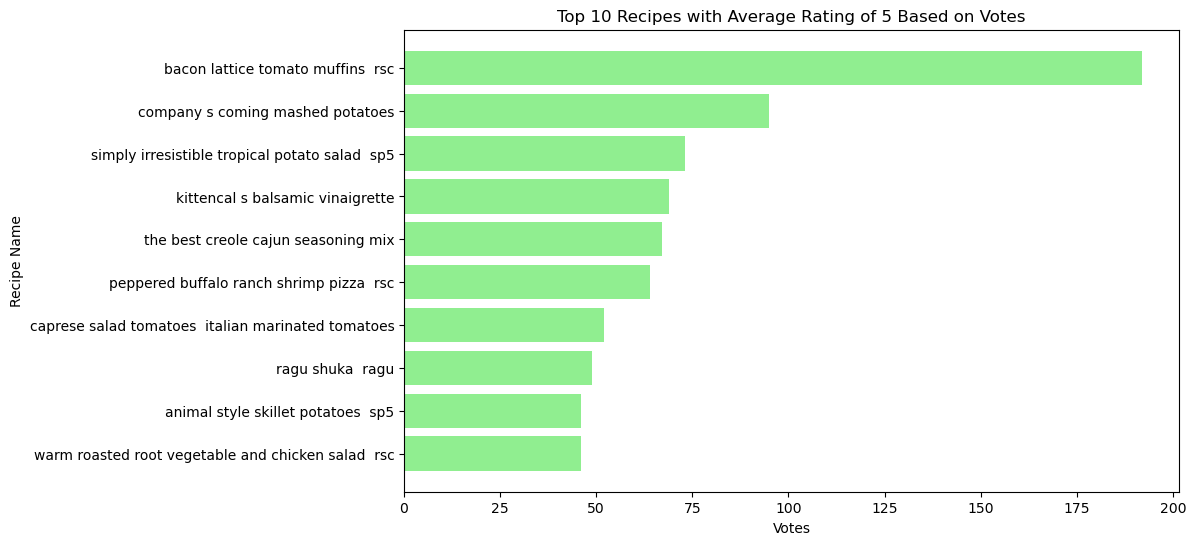

In [16]:
filtered_recipes = food_df[food_df['average_rating'] == 5]
top_recipes = filtered_recipes.nlargest(10, 'votes')

plt.figure(figsize=(10, 6))
plt.barh(top_recipes['name'], top_recipes['votes'], color='lightgreen')
plt.xlabel('Votes')
plt.ylabel('Recipe Name')
plt.title('Top 10 Recipes with Average Rating of 5 Based on Votes')
plt.gca().invert_yaxis()
plt.show()


In [23]:
food_df.select_dtypes(include='object').columns

Index(['name', 'id', 'contributor_id', 'tags', 'steps', 'description',
       'ingredients', 'submitted_month', 'recipe_id'],
      dtype='object')